## Increase Uvic AMOC Hovs

In [10]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/archive/uvic/Psi_PI2.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LATITUDE_V'][:]
cntrl_psi = nc.variables['PSI'][:]
depth = nc.variables['DEPTH'][:]
nc.close() # close the file

print cntrl_psi.shape
print lat.shape
print depth.shape

file ='/g/data1/v45/pas561/mom/archive/uvic/Psi_wind_PI.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
pi_psi = nc.variables['PSI'][:]
nc.close() # close the file
print pi_psi.shape

file ='/g/data1/v45/pas561/mom/archive/uvic/Psi_wind_UP.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
up_psi = nc.variables['PSI'][:]
nc.close() # close the file
print up_psi.shape



(50, 19, 100)
(100,)
(19,)
(38, 19, 100)
(38, 19, 100)


In [12]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.9.6


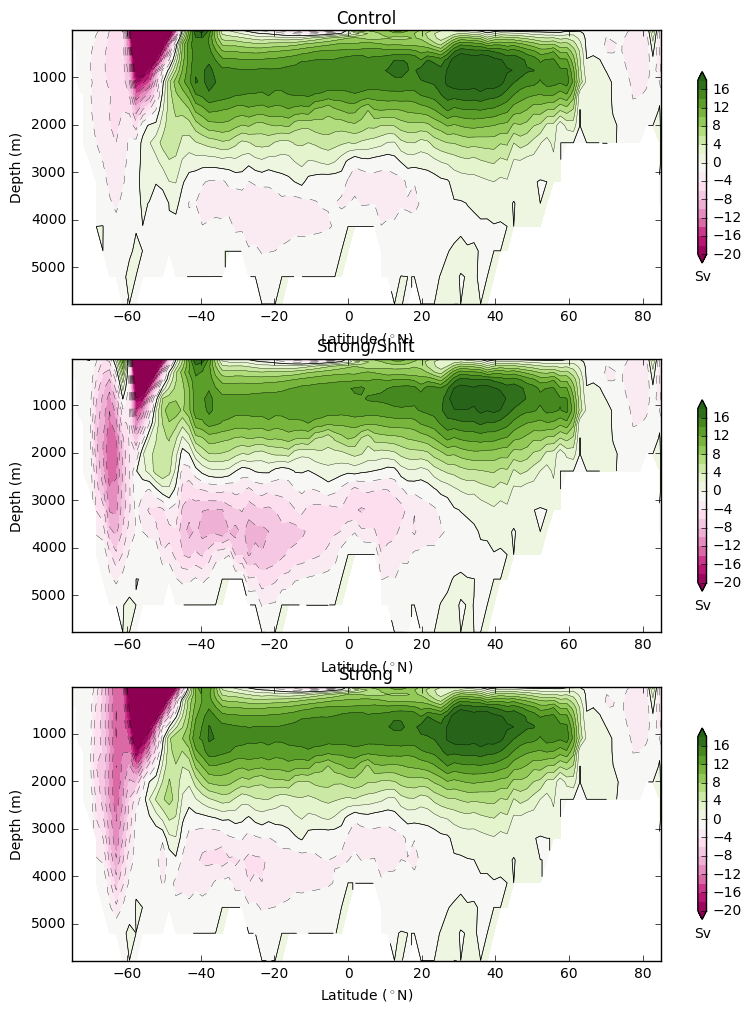

In [13]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,20,2)

t1=30
t2=38

plt.subplot(311)
plt.contourf(lat,depth,np.mean(cntrl_psi[40:50,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,depth,np.mean(cntrl_psi[40:50,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,depth,np.mean(cntrl_psi[40:50,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')

plt.subplot(312)
plt.contourf(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')
plt.title('Strong/Shift')

plt.subplot(313)
plt.contourf(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')
plt.title('Strong')



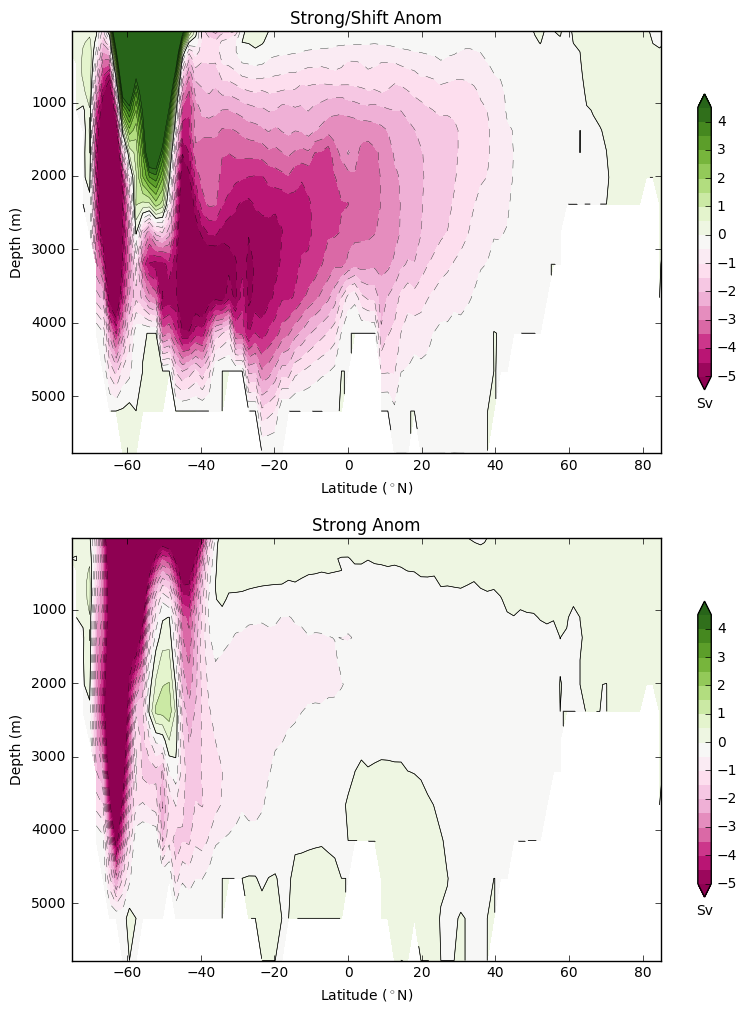

In [20]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-5,5,.5)

t1=30
t2=38

plt.subplot(211)
plt.contourf(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,depth,np.mean(pi_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')
plt.title('Strong/Shift Anom')

plt.subplot(212)
plt.contourf(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,depth,np.mean(up_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[40:50,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')
plt.title('Strong Anom')



In [26]:
print lat[60:80]
print lat[63]
print lat[69]
print lat[79]

print depth[5:8]

[ 19.79999924  21.60000038  23.39999962  25.20000076  27.          28.79999924
  30.60000038  32.40000153  34.20000076  36.          37.79999924
  39.59999847  41.40000153  43.20000076  45.          46.79999924
  48.59999847  50.40000153  52.20000076  54.        ]
25.2000007629
36.0
54.0
[  642.5   857.5  1102.5]


(38,)
[ 54.]
1102.5
(50, 19, 1)
(50, 19)
(50,)
(39,)
(39,)
[ 36.]
1102.5
(50, 19, 1)
(50,)
(39,)
(39,)
[ 25.20000076]
1102.5
(50, 19, 1)
(50,)
(39,)
(39,)


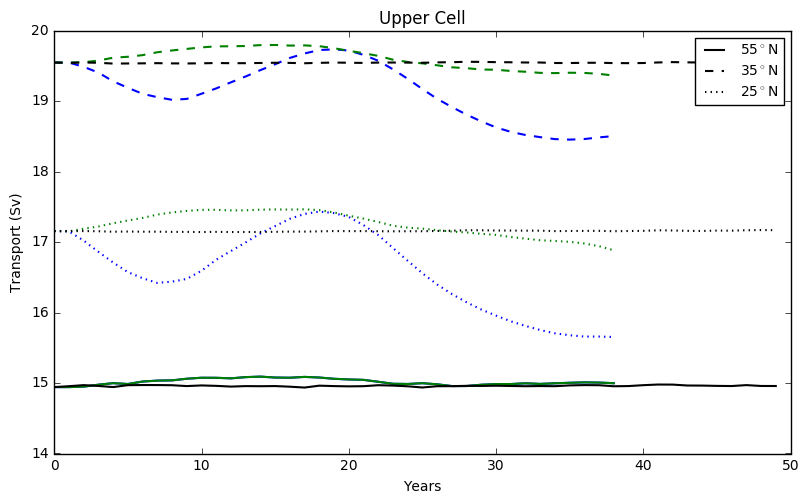

In [30]:
#plot time series of AMOC in z space
T=np.arange(38)
print T.shape

#do nh upper cell at 55N
j1 = 79
j2=80

print lat[j1:j2]
print depth[7]
st_min=7

cntrl55N_psj = cntrl_psi[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl55N_psj_bar = np.mean(cntrl55N_psj,2)
print cntrl55N_psj_bar.shape
cntrl55N_psj_ts = np.max(cntrl55N_psj_bar[:,st_min:],1)
print cntrl55N_psj_ts.shape

up55N_psj = up_psi[:,:,j1:j2]
up55N_psj_bar = np.mean(up55N_psj,2)
up55N_psj_ts = np.max(up55N_psj_bar[:,st_min:],1)
up55N_psj_ts = np.insert(up55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape

pi55N_psj = pi_psi[:,:,j1:j2]
pi55N_psj_bar = np.mean(up55N_psj,2)
pi55N_psj_ts = np.max(pi55N_psj_bar[:,st_min:],1)
pi55N_psj_ts = np.insert(pi55N_psj_ts,0,cntrl55N_psj_ts[0])
print pi55N_psj_ts.shape

#do nh upper cell at 35N
j1 = 69
j2=70

print lat[j1:j2]
print depth[st_min]

cntrl35N_psj = cntrl_psi[:,:,j1:j2]
print cntrl35N_psj.shape
cntrl35N_psj_bar = np.mean(cntrl35N_psj,2)
cntrl35N_psj_ts = np.max(cntrl35N_psj_bar[:,st_min:],1)
print cntrl35N_psj_ts.shape

up35N_psj = up_psi[:,:,j1:j2]
up35N_psj_bar = np.mean(up35N_psj,2)
up35N_psj_ts = np.max(up35N_psj_bar[:,st_min:],1)
up35N_psj_ts = np.insert(up35N_psj_ts,0,cntrl35N_psj_ts[0])
print up35N_psj_ts.shape

pi35N_psj = pi_psi[:,:,j1:j2]
pi35N_psj_bar = np.mean(pi35N_psj,2)
pi35N_psj_ts = np.max(pi35N_psj_bar[:,st_min:],1)
pi35N_psj_ts = np.insert(pi35N_psj_ts,0,cntrl35N_psj_ts[0])
print pi35N_psj_ts.shape


#do nh upper cell at 25N
j1 = 63
j2=64

print lat[j1:j2]
print depth[st_min]

cntrl25N_psj = cntrl_psi[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl25N_psj_bar = np.mean(cntrl25N_psj,2)
cntrl25N_psj_ts = np.max(cntrl25N_psj_bar[:,st_min:],1)
print cntrl25N_psj_ts.shape

up25N_psj = up_psi[:,:,j1:j2]
up25N_psj_bar = np.mean(up25N_psj,2)
up25N_psj_ts = np.max(up25N_psj_bar[:,st_min:],1)
up25N_psj_ts = np.insert(up25N_psj_ts,0,cntrl25N_psj_ts[0])
print up25N_psj_ts.shape

pi25N_psj = pi_psi[:,:,j1:j2]
pi25N_psj_bar = np.mean(pi25N_psj,2)
pi25N_psj_ts = np.max(pi25N_psj_bar[:,st_min:],1)
pi25N_psj_ts = np.insert(pi25N_psj_ts,0,cntrl25N_psj_ts[0])
print pi25N_psj_ts.shape

plt.subplot(211)
plt.plot(pi55N_psj_ts[:],linestyle='-',color='b',linewidth=1.5)
plt.plot(up55N_psj_ts[:],linestyle='-',color='g',linewidth=1.5)
plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='55$^\circ$N',linewidth=1.5)
plt.plot(pi35N_psj_ts[:],linestyle='--',color='b',linewidth=1.5)
plt.plot(up35N_psj_ts[:],linestyle='--',color='g',linewidth=1.5)
plt.plot(cntrl35N_psj_ts,linestyle='--',color='k',label='35$^\circ$N',linewidth=1.5)
plt.plot(pi25N_psj_ts[:],linestyle=':',color='b',linewidth=1.5)
plt.plot(up25N_psj_ts[:],linestyle=':',color='g',linewidth=1.5)
plt.plot(cntrl25N_psj_ts,linestyle=':',color='k',label='25$^\circ$N',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell')
plt.legend(fontsize=10)


(38,)
1102.5
(38, 19, 100)
(38, 100)
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5  5. ]
(38, 19, 100)
(38, 100)


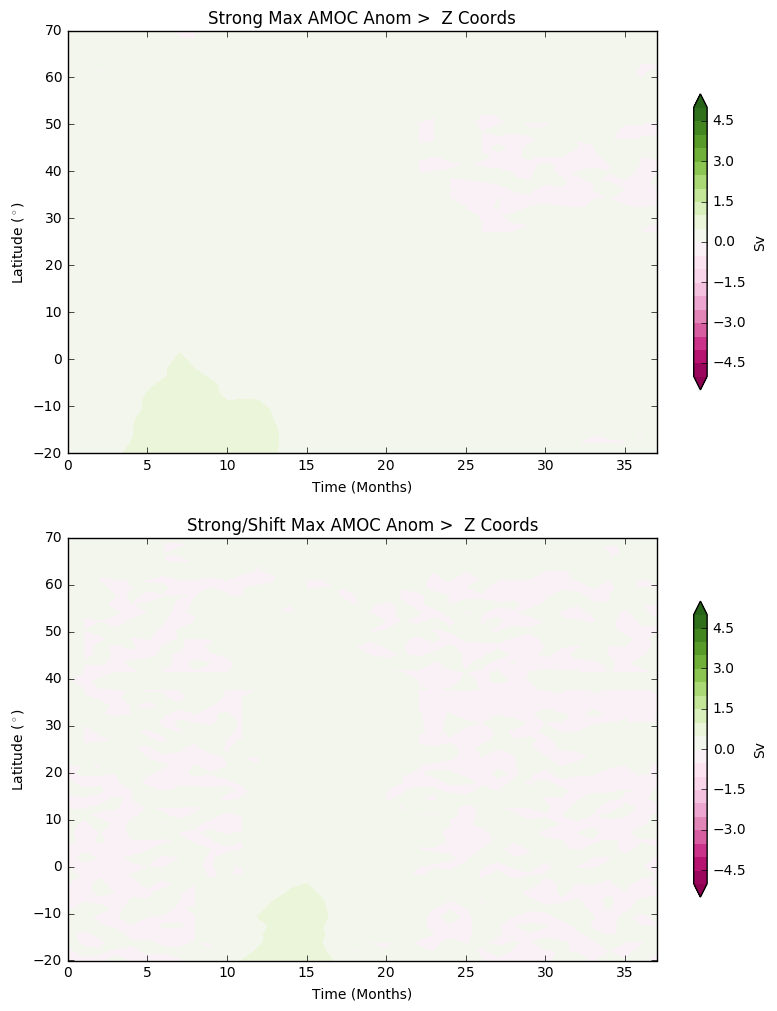

In [35]:
#Hovmoeller in z space
time = np.arange(0,38,1)
print time.shape


print depth[7]
st_min=7


up_amoc_z_anom= up_psi[:,:,:] - cntrl_psi[0:38,:,:]
print up_amoc_z_anom.shape

up_amoc_z_anom_max = np.max(up_amoc_z_anom[:,st_min:,:],1)
print up_amoc_z_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-5,5,21)
print clev

plt.subplot(211)
plt.contourf(time,lat,up_amoc_z_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong Max AMOC Anom >  Z Coords')

pi_amoc_z_anom= pi_psi[:,:,:] - cntrl_psi[0:38,:,:]
print up_amoc_z_anom.shape

pi_amoc_z_anom_max = np.max(pi_amoc_z_anom[:,st_min:,:],1)
print pi_amoc_z_anom_max.shape

plt.subplot(212)
plt.contourf(time,lat,pi_amoc_z_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong/Shift Max AMOC Anom >  Z Coords')



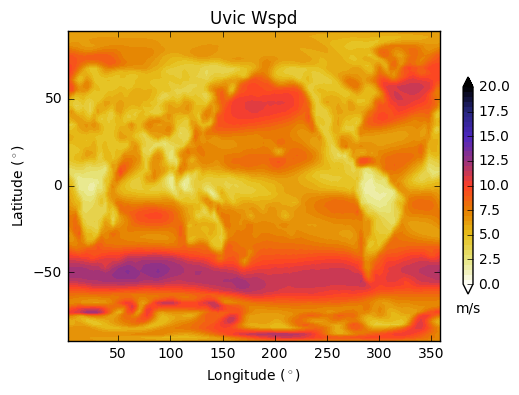

In [27]:
clev = np.arange(0,20.5,0.5)

plt.contourf(lon,lat,np.mean(wspd,axis=0),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('Uvic Wspd')

plt.show()

In [19]:
#find values within lat lon bounds
#tmp1=np.argwhere(lon>290)# and lon<320)
#tmp2=np.argwhere(lon>320)# and lon<320)
tmp4=np.argwhere(lat>-72)# and lat<-45)
tmp3=np.argwhere(lat>-32)# and lat<-45)


In [24]:
lat_start, lat_end = tmp3[1][0], tmp4[1][0]
print lat_end, lat_start
print lat[lat_start], lat[lat_end]

11 33
-29.7 -69.3


In [25]:
wspd2 = wspd.copy()
wspd2[:,lat_end:lat_start, :]=wspd2[:,lat_end:lat_start, :]*1.15



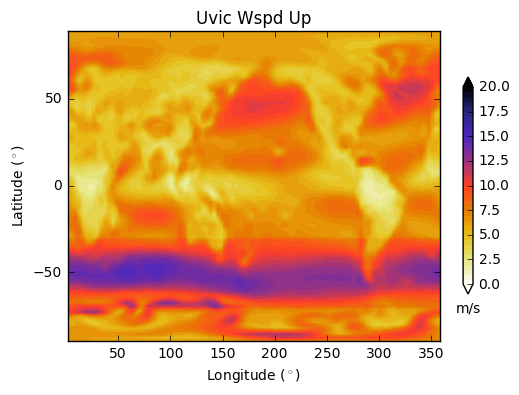

In [26]:
clev = np.arange(0,20.5,0.5)

plt.contourf(lon,lat,np.mean(wspd2,axis=0),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('Uvic Wspd Up')

plt.show()

In [29]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/uvic/A_windsurUp.nc', 'a')

var = ofile.variables['A_windspd']
print var.shape
print wspd2.shape
var[:] = wspd2

ofile.sync()
ofile.close()

(12, 100, 100)
(12, 100, 100)


In [ ]:
#shift the winds and then strenthen.

In [30]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/archive/uvic/A_windsur.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
wspd = nc.variables['A_windspd'][:]
nc.close() # close the file

print wspd.shape
print lat.shape
print lon.shape
print lat

(12, 100, 100)
(100,)
(100,)
[-89.09999847 -87.30000305 -85.5        -83.69999695 -81.90000153
 -80.09999847 -78.30000305 -76.5        -74.69999695 -72.90000153
 -71.09999847 -69.30000305 -67.5        -65.69999695 -63.90000153
 -62.09999847 -60.29999924 -58.5        -56.70000076 -54.90000153
 -53.09999847 -51.29999924 -49.5        -47.70000076 -45.90000153
 -44.09999847 -42.29999924 -40.5        -38.70000076 -36.90000153
 -35.09999847 -33.29999924 -31.5        -29.70000076 -27.89999962
 -26.10000038 -24.29999924 -22.5        -20.70000076 -18.89999962
 -17.10000038 -15.30000019 -13.5        -11.69999981  -9.89999962
  -8.10000038  -6.30000019  -4.5         -2.70000005  -0.89999998
   0.89999998   2.70000005   4.5          6.30000019   8.10000038
   9.89999962  11.69999981  13.5         15.30000019  17.10000038
  18.89999962  20.70000076  22.5         24.29999924  26.10000038
  27.89999962  29.70000076  31.5         33.29999924  35.09999847
  36.90000153  38.70000076  40.5         42.299

In [32]:
tmp4=np.argwhere(lat>-72)# and lat<-45)
tmp3=np.argwhere(lat>-32)# and lat<-45)


In [40]:
lat_start, lat_end = tmp3[1][0], tmp4[1][0]
print lat_end, lat_start
print lat[lat_start], lat[lat_end]
print lat[lat_start]-lat[lat_start-1]
print lat[lat_end]-lat[lat_end+1]

11 33
-29.7 -69.3
1.8
-1.8


In [41]:
wspd2 = wspd.copy()
wspd2[:,lat_end:lat_start, :]=wspd2[:,lat_end+2:lat_start+2, :]


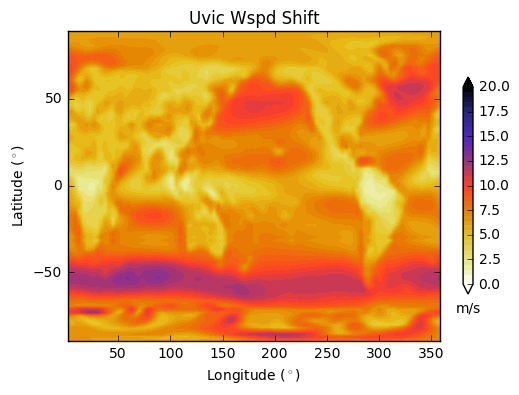

In [42]:
clev = np.arange(0,20.5,0.5)

plt.contourf(lon,lat,np.mean(wspd2,axis=0),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('Uvic Wspd Shift')

plt.show()

In [44]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/uvic/A_windsurSH.nc', 'a')

var = ofile.variables['A_windspd']
print var.shape
print wspd2.shape
var[:] = wspd2

ofile.sync()
ofile.close()

(12, 100, 100)
(12, 100, 100)


In [45]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/archive/uvic/A_windsurSH.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
wspd = nc.variables['A_windspd'][:]
nc.close() # close the file

print wspd.shape
print lat.shape
print lon.shape
print lat

(12, 100, 100)
(100,)
(100,)
[-89.09999847 -87.30000305 -85.5        -83.69999695 -81.90000153
 -80.09999847 -78.30000305 -76.5        -74.69999695 -72.90000153
 -71.09999847 -69.30000305 -67.5        -65.69999695 -63.90000153
 -62.09999847 -60.29999924 -58.5        -56.70000076 -54.90000153
 -53.09999847 -51.29999924 -49.5        -47.70000076 -45.90000153
 -44.09999847 -42.29999924 -40.5        -38.70000076 -36.90000153
 -35.09999847 -33.29999924 -31.5        -29.70000076 -27.89999962
 -26.10000038 -24.29999924 -22.5        -20.70000076 -18.89999962
 -17.10000038 -15.30000019 -13.5        -11.69999981  -9.89999962
  -8.10000038  -6.30000019  -4.5         -2.70000005  -0.89999998
   0.89999998   2.70000005   4.5          6.30000019   8.10000038
   9.89999962  11.69999981  13.5         15.30000019  17.10000038
  18.89999962  20.70000076  22.5         24.29999924  26.10000038
  27.89999962  29.70000076  31.5         33.29999924  35.09999847
  36.90000153  38.70000076  40.5         42.299

In [46]:
tmp4=np.argwhere(lat>-72)# and lat<-45)
tmp3=np.argwhere(lat>-32)# and lat<-45)


In [47]:
lat_start, lat_end = tmp3[1][0], tmp4[1][0]
print lat_end, lat_start
print lat[lat_start], lat[lat_end]
print lat[lat_start]-lat[lat_start-1]
print lat[lat_end]-lat[lat_end+1]

11 33
-29.7 -69.3
1.8
-1.8


In [48]:
wspd2 = wspd.copy()
wspd2[:,lat_end:lat_start, :]=wspd2[:,lat_end:lat_start, :]*1.15

In [49]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/uvic/A_windsurPI.nc', 'a')

var = ofile.variables['A_windspd']
print var.shape
print wspd2.shape
var[:] = wspd2

ofile.sync()
ofile.close()

(12, 100, 100)
(12, 100, 100)
